<a href="https://colab.research.google.com/github/stillinsight/hent-ai/blob/main/%E3%82%A8%E3%83%ADVNGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **gpt-2 simple model** 
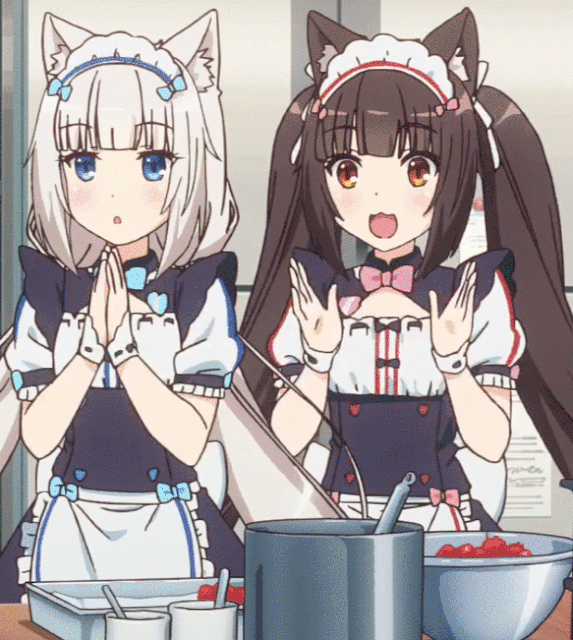

quick test based on https://github.com/minimaxir/gpt-2-simple

training set short collection of VNs in one file


to do:
1.   VN pipeline
  * VN PDF to txt
  * clean text
  * store in github
2.  Optimize model
  * 356M does NOT work in collab pro





# Get specs

In [ ]:
from psutil import virtual_memory
colab_pro = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(colab_pro))

if colab_pro < 20:
  print('Not using a high-RAM runtime')
  # train model with lower settings
else:
  print('You are using a high-RAM runtime!')
  # train model with higher settings

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
!nvidia-smi!/usr/local/cuda/bin/nvcc --version

!nvidia-smi

/bin/bash: nvidia-smi!/usr/local/cuda/bin/nvcc: No such file or directory
Fri Dec 16 04:09:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
              

# File Stuff


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import os
if os.path.isdir( '/content/drive'):
    print("Exists")
else:
    print("Doesn't exists")
    os.makedirs('/content/drive/MyDrive/gpt2-novel')


Exists


In [ ]:
!cd /content/drive/MyDrive/gpt2-novel

In [ ]:
!unzip /content/drive/MyDrive/ln_data/merged_novels.zip /content/merged_novels.txt

Archive:  /content/drive/MyDrive/ln_data/merged_novels.zip
caution: filename not matched:  /content/merged_novels.txt


In [ ]:
!git clone https://github.com/stillinsight/hent-ai.git

Cloning into 'hent-ai'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 25 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.


# program start stuff


In [ ]:
!pip3 install gpt_2_simple

In [ ]:

gpt2.mount_gdrive()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


install simple gpt2 model. based on https://github.com/minimaxir/gpt-2-simple

In [ ]:
!export PYTHONIOENCODING=UTF-8

import gpt_2_simple as gpt2

In [ ]:
import gpt_2_simple as gpt2

# Get model

In [ ]:
model_name="355M"

In [ ]:
model_name="124M"

In [ ]:
if not os.path.isdir(os.path.join("models", model_name)):
	print(f"Downloading {model_name} model...")
	gpt2.download_gpt2(model_name=model_name) 

Fetching checkpoint: 1.05Mit [00:00, 529Mit/s]                                                      
Fetching encoder.json: 1.05Mit [00:01, 641kit/s]
Fetching hparams.json: 1.05Mit [00:00, 449Mit/s]                                                    
Fetching model.ckpt.data-00000-of-00001: 1.42Git [03:27, 6.83Mit/s]
Fetching model.ckpt.index: 1.05Mit [00:00, 426Mit/s]                                                
Fetching model.ckpt.meta: 1.05Mit [00:01, 644kit/s]
Fetching vocab.bpe: 1.05Mit [00:01, 801kit/s]


# Input data

choose novel.txt for small data set
merged_novels is 5gbs!!!!

In [ ]:
file_name = "/content/hent-ai/novel.txt"

In [ ]:
file_name = "/content/merged_novels.txt"

# Finetune the GPT2 model

**IMPORTANT NOTE:** If you want to rerun this cell, **restart the VM first** (Runtime -> Restart Runtime). You will need to rerun imports but not recopy files.

Other optional-but-helpful parameters for `gpt2.finetune`:


*  **`restore_from`**: Set to `fresh` to start training from the base GPT-2, or set to `latest` to restart training from an existing checkpoint.
* **`sample_every`**: Number of steps to print example output
* **`print_every`**: Number of steps to print training progress.
* **`learning_rate`**:  Learning rate for the training. (default `1e-4`, can lower to `1e-5` if you have <1MB input data)
*  **`run_name`**: subfolder within `checkpoint` to save the model. This is useful if you want to work with multiple models (will also need to specify  `run_name` when loading the model)
* **`overwrite`**: Set to `True` if you want to continue finetuning an existing model (w/ `restore_from='latest'`) without creating duplicate copies. 



In [ ]:
gpt2.copy_checkpoint_from_gdrive(run_name='run1')

In [ ]:
run_time='355M_large'

In [ ]:
run_time='124M_large'

In [ ]:
run_time='124M_small'

In [ ]:

sess = gpt2.start_tf_sess()

gpt2.finetune(sess,
              dataset=file_name,
              model_name=model_name,
              restore_from='latest',
              run_name='run1',
              print_every=10,
              sample_every=200,
              save_every=500,
              steps=1000)   # steps is max number of training steps

to do
check to load checkpoint each time before finetuning.
save after everyt cehckpoint?
then post to drive
then load?


All finetuned model checkpoints are stored in run_name, and the model saves a new checkpoint every save_every, samples from the most recent weights sample_every steps and prints to screen print_every steps. Different run_name can be used to experiment with different sets of keywords and/or datasets. Also one can resume a halted training process either from different checkpoints or the latest one as mentioned in the restore_from parameter.

In [ ]:
gpt2.copy_checkpoint_to_gdrive(run_name='run1')

Train the model
picks up from checkpoint locatied in checkpoint/run1
you can tell its working from checkpoint based on where it starts back up on training

# Generate Text

In [ ]:
sess = gpt2.start_tf_sess()
gpt2.load_gpt2(sess)

gpt2.generate(sess,
              temperature=0.7,
              length=250,
              top_k=40,
              nsamples=5,
              batch_size=1,
              prefix="  I should not be doing this. I dont want you cum inside of me, Master")

Loading checkpoint checkpoint/run1/model-1000
  I should not be doing this. I dont want you cum inside of me, Master.”

I should have been prepared for this when I made Roxanne mine, but she still
seemed to be confused by my sudden change of heart.

“Oh, no, we can’t do that! I mean, I could feel you inside me back at the Slave
Merchant’s shop! So I’m not that different!”

“Then be sure to keep your cock nice and clean when you leave here.”

“Understood. I will be watching your every move, master, so please be sure to
make sure you pay attention to everything going on around you.”

The little sister succubus must have been a commoner since she was not a noble,
so she probably did not know much about the ways of the upper class. If she
had known, she would have probably done something about it instead of being so
confused.

After returning to our new room, I made preparations to do some light housework.
    Now that the cleaning was done for the day, I could finally leave my old room. I

text generation
*batch_size* 
  - number of texts to generate at a time

*temperature* 
  - higher increases “creativity” by allowing the network to more likely make suboptimal predictions
  - Higher temperatures work better (e.g. 0.7 - 1.0) to generate more interesting text

*prefix* 
  - specify text start

*top_p* 
  - nucleus sampling


GPT-2 allows you to generate texts in parallel by setting a batch_size that is divisible into nsamples, resulting in much faster generation. Works very well with a GPU (can set batch_size up to 20 on Colaboratory's K80)!

(GPT-2 cannot stop early upon reaching a specific end token. (workaround: pass the truncate parameter to a generate function to only collect text until a specified end token. You may want to reduce length appropriately.)


theory on
For this, we can use both top k sampling as well as top p (nuclues sampling), whatever works better for dataset of interest. We could also play with the temperature parameter to play with the creativity/sensibility (a variant of the bias/variance) trade-off.

Please note the naiveity in this approach, which can best understand what’s going on by considering the following scenario:

===============================

Real life:

Professor to Student: This project is an absolute garbage.

===============================

(this clearly is a negative sentiment say 1.0 and the keyword is project)

===============================

Finetuned GPT-2 life:

Professor to Student: <|startoftext|>~`1.0~^project~@This project is an absolute garbage.

===============================

What is really happening is that we are training the model (falsely) to believe that normal text, is always spoken such that you declare your sentiment and keywords before saying the sentence out.

So then we can leverage GPT-2’s starting prompt ability to condition the generating apriori by adding the keyword to the starting prompt.

# Reset Env

In [ ]:
import tensorflow as tf
from keras import backend as K
K.clear_session()

In [ ]:
tf.compat.v1.reset_default_graph()
#graph = tf.get_default_graph()


this resets session. need to do this after each time run model or will error out